In [1]:
import numpy
import scipy
import matplotlib
from matplotlib import pyplot
import http.client
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['font.size'] = 16

In [3]:
def process_libsvmdataset_line(line, num_features):
    (label_str, features_string) = line.split(" ",maxsplit=1)
    label = float(label_str)
    features = numpy.zeros(num_features)
    for f in features_string.split(" "):
        (i,v) = f.split(":");
        features[int(i)-1] = float(v);
    return (label,features)

def get_cpusmall_dataset():
    num_features = 12
    conn = http.client.HTTPSConnection("www.csie.ntu.edu.tw")
    conn.request("GET", "/~cjlin/libsvmtools/datasets/regression/cpusmall")
    r = conn.getresponse()
    assert(r.status == 200)
    cpusmall_dataset_bytes = r.read()
    cpusmall_dataset_str = cpusmall_dataset_bytes.decode("utf-8")
    cpusmall_dataset_lines = cpusmall_dataset_str.strip().split("\n")
    num_examples = len(cpusmall_dataset_lines)
    labels = numpy.zeros(num_examples)
    features = numpy.zeros((num_examples, num_features+1)) #add one extra feature that's always 1, for the constant offset
    for i in range(num_examples):
        (label,feats) = process_libsvmdataset_line(cpusmall_dataset_lines[i], num_features)
        labels[i] = label
        features[i,0:num_features] = feats
        features[i,num_features] = 1.0
    return (labels, features)

In [4]:
# load the CPUsmall dataset from the libsvm datasets website
(cpusmall_labels, cpusmall_examples) = get_cpusmall_dataset();

In [11]:
cpusmall_labels

array([90., 88., 85., ..., 92., 96., 80.])

This is a linear regression task, which has empirical risk
$$
R(w) = \frac{1}{n} \sum_{i=1}^n (x_i^T w - y_i)^2.
$$
The gradient is
$$
\nabla R(w) = \frac{2}{n} \sum_{i=1}^n x_i (x_i^T w - y_i).
$$

In [12]:
# loss of linear regression task
def linreg_loss(w, Xs, Ys):
    return numpy.mean((Xs @ w - Ys)**2)

# gradient of linear regression task
def linreg_grad(w, Xs, Ys):
    return (Xs.T @ (Xs @ w - Ys)) * (2/len(Ys))

def linreg_gradient_descent(Xs, Ys, alpha, w0, num_iters):
    w = w0;
    losses = numpy.zeros(num_iters + 1)
    for k in range(num_iters):
        losses[k] = linreg_loss(w, Xs, Ys)
        w = w - alpha * linreg_grad(w, Xs, Ys)
    losses[num_iters] = linreg_loss(w, Xs, Ys)
    return (w, losses);


In [13]:
# we can find the exact solution as follows
w_optimal = numpy.linalg.inv(cpusmall_examples.T @ cpusmall_examples) @ cpusmall_examples.T @ cpusmall_labels;
loss_optimal = linreg_loss(w_optimal, cpusmall_examples, cpusmall_labels);

print(f"optimal loss: {loss_optimal}");

optimal loss: 96.3657526859297


In [14]:
w0 = numpy.zeros(13)
alpha = 1e-13 # setting the step size larger results in divergence!
num_iters = 50

(w_gd, losses_gd) = linreg_gradient_descent(cpusmall_examples, cpusmall_labels, alpha, w0, num_iters)

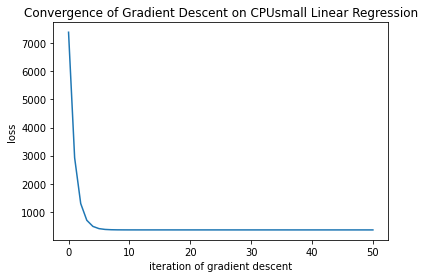

In [15]:
pyplot.plot(range(num_iters+1), losses_gd);
pyplot.xlabel("iteration of gradient descent");
pyplot.ylabel("loss");
pyplot.title("Convergence of Gradient Descent on CPUsmall Linear Regression");

# Did gradient descent converge well on this example? Can we tell from this figure?

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.



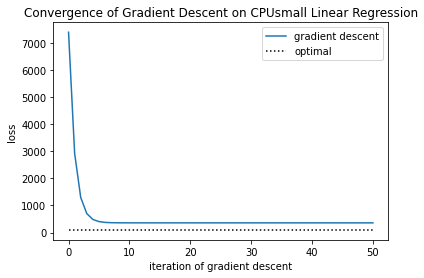

In [16]:
pyplot.plot(range(num_iters+1), losses_gd, label="gradient descent");
pyplot.plot(range(num_iters+1), 0 * losses_gd + loss_optimal, linestyle=":", c="k", label="optimal");
pyplot.xlabel("iteration of gradient descent")
pyplot.ylabel("loss")
pyplot.title("Convergence of Gradient Descent on CPUsmall Linear Regression")
pyplot.legend();

# What went wrong? How could we fix this?

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

## Maybe looking at the dataset would help!

In [20]:
for i in range(13):
    print(cpusmall_examples[2,i])

62.0
77.0
3806.0
258.0
166.0
1.4
1.4
492142.0
268706.0
5.2
256.0
1314590.0
1.0


## Does this give any new insights?

.

.

.

.

.

.

.

.

.

.

.

.

.

.


In [21]:
# normalize the examples in two ways

# mean = 0, variance = 1
cpusmall_mean = numpy.mean(cpusmall_examples, axis=0)
cpusmall_mean[12] = 0.0 # keep the bias term
cpusmall_var = numpy.mean((cpusmall_examples - cpusmall_mean)**2, axis=0)
cpusmall_normalized1 = (cpusmall_examples - cpusmall_mean) / numpy.sqrt(cpusmall_var)

# scale by max all features lie in [-1,1]
cpusmall_max = numpy.max(numpy.abs(cpusmall_examples), axis=0)
cpusmall_normalized2 = cpusmall_examples / cpusmall_max

In [22]:
# we can find the exact solution as follows
w_opt_normalized1 = numpy.linalg.inv(cpusmall_normalized1.T @ cpusmall_normalized1) @ cpusmall_normalized1.T @ cpusmall_labels
loss_opt_normalized1 = linreg_loss(w_opt_normalized1, cpusmall_normalized1, cpusmall_labels)

w_opt_normalized2 = numpy.linalg.inv(cpusmall_normalized2.T @ cpusmall_normalized2) @ cpusmall_normalized2.T @ cpusmall_labels;
loss_opt_normalized2 = linreg_loss(w_opt_normalized2, cpusmall_normalized2, cpusmall_labels)

# should all be the same
print(f"optimal loss (without normalization): {loss_optimal}");
print(f"optimal loss (with  normalization 1): {loss_opt_normalized1}");
print(f"optimal loss (with  normalization 2): {loss_opt_normalized2}");

optimal loss (without normalization): 96.3657526859297
optimal loss (with  normalization 1): 96.3657526859297
optimal loss (with  normalization 2): 96.3657526859297


In [23]:
w0 = numpy.zeros(13)
alpha = 0.1 # setting the step size larger results in divergence!
(w_gdn, losses_gdn1) = linreg_gradient_descent(cpusmall_normalized1, cpusmall_labels, alpha, w0, num_iters)

w0 = numpy.zeros(13)
alpha = 0.5 # setting the step size larger results in divergence!
(w_gdn, losses_gdn2) = linreg_gradient_descent(cpusmall_normalized2, cpusmall_labels, alpha, w0, num_iters)

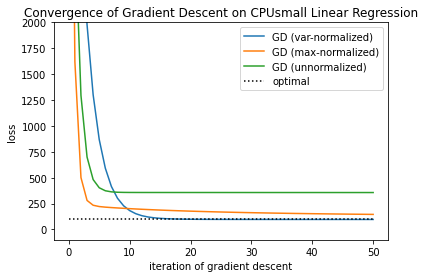

In [24]:
pyplot.plot(range(num_iters+1), losses_gdn1, label="GD (var-normalized)");
pyplot.plot(range(num_iters+1), losses_gdn2, label="GD (max-normalized)");
pyplot.plot(range(num_iters+1), losses_gd, label="GD (unnormalized)");
pyplot.plot(range(num_iters+1), 0 * losses_gd + loss_optimal, linestyle=":", c="k", label="optimal");
pyplot.xlabel("iteration of gradient descent");
pyplot.ylabel("loss");
pyplot.title("Convergence of Gradient Descent on CPUsmall Linear Regression");
pyplot.ylim((-100,2000))
pyplot.legend();

Can we interpret this in terms of the condition number?

For linear regression, $$\nabla^2 R(w) = 2 \frac{1}{n} \sum_{i=1}^n x_i x_i^T = \frac{2}{n} X^T X.$$

In [25]:
D2R_unnormalized = (cpusmall_examples.T @ cpusmall_examples) * 2 / len(cpusmall_labels);
D2R_normalized1 = (cpusmall_normalized1.T @ cpusmall_normalized1) * 2 / len(cpusmall_labels);
D2R_normalized2 = (cpusmall_normalized2.T @ cpusmall_normalized2) * 2 / len(cpusmall_labels);

In [27]:
def condition_number(H):
    # make sure H is symmetric for the eigendecomposition
    H = (H + H.T) / 2;
    ev = numpy.linalg.eigvals(H);
    mu = numpy.min(ev);
    L = numpy.max(ev);
    kappa = L / mu;
    return kappa;

In [28]:
print(f"unnormalized, kappa = {(condition_number(D2R_unnormalized))}")

unnormalized, kappa = 49943068260030.8


In [29]:
print(f"var normalized, kappa = {(condition_number(D2R_normalized1))}")

var normalized, kappa = 43.805303354607034


In [30]:
print(f"max normalized, kappa = {(condition_number(D2R_normalized2))}")

max normalized, kappa = 14128.211688196854


# What can we conclude from this demo?